<img src="Figuras/logo.png" style="width:1200px;height:250px"/>

## Ilum Escola de Ciência 
###  Curso: Análise Numérica
### Professor: José Mario Martinez
### Aluno: Isabela Beneti
### Séries de Fourier

## Introdução



No dia 25/04, na aula do pr. Martínez, aprendemos a fórmula da série de Fourier para uma função periódica. A série em sí se escreve da seguinte forma:<br>
<br>
$S(x) = \frac{A_0}{2} + \sum\limits_{n = 1}^{\infty}A_n\cdot sen(nx) + B_n\cdot cos(nx)$
<br>
<br>
Para encontrar os coeficientes $A_n$ e $B_n$ da serie que aproxima uma função f(x), usamos a formula:<br>
<br>
$A_0 = \frac{1}{\pi}\int_0^{2\pi} f(x) dx$<br>
<br>
$A_n = \frac{1}{\pi}\int_0^{2\pi} f(x)\cdot sen(nx)dx$<br>
<br>
$B_n = \frac{1}{\pi}\int_0^{2\pi} f(x)\cdot cos(nx)dx$<br>
<br>

## Objetivo

Encontrar um polinômio de Fourier que aproxima a função correspondente ao desenho feito no quadro pelo professor Martínez, no dia 25/04.

## Importações



In [1]:
import matplotlib.pyplot as plt
import random as rd
import numpy as np
from scipy import integrate
plt.style.use('seaborn-bright')
import imageio
from scipy.interpolate import interp1d
import warnings

# Plotando o gráfico original



Primeiramente, vamos plotar o desenho:

In [2]:
DESENHO_MARTINEZ = [
    [0.05, 1.49], [0.25, 1.75], 
    [0.49, 1.98], [0.68, 2.27],
    [0.84, 2.53], [1.02, 2.91], 
    [1.19, 3.23], [1.4, 3.65], 
    [1.58, 3.91], [1.72, 3.8], 
    [1.87, 3.43], [2.01, 3.18], 
    [2.17, 2.82], [2.35, 2.51], 
    [2.54, 2.18], [2.76, 1.77], 
    [2.93, 1.41], [3.1, 1.06], 
    [3.26, 1.1], [3.38, 1.35], 
    [3.46, 1.68], [3.59, 1.91], 
    [3.73, 2], [3.84, 1.79], 
    [3.9, 1.52], [4, 1.32], 
    [4.09, 1.09], [4.2, 1.53],
    [4.25, 1.84], [4.31, 2.26],
    [4.47, 2.34], [4.7, 2.49], 
    [4.86, 2.6], [5.04, 2.74],
    [5.21, 2.87], [5.39, 2.99], 
    [5.48, 3.09], [5.55, 2.93],
    [5.61, 2.76], [5.7, 2.61], 
    [5.81, 2.37], [5.89, 2.16],
    [6, 2], [6.09, 1.77],
    [6.19, 1.57]]

Text(0.5, 1.0, 'Desenho Pr. Martínez')

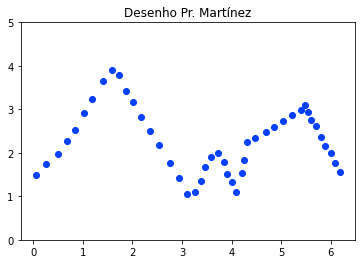

In [16]:
x = []
y = []
for i in DESENHO_MARTINEZ:
    x.append(i[0])
    y.append(i[1])
x = np.array(x)
y = np.array(y)
fig, ax = plt.subplots(1,1)
ax.plot(x,y,'o')
ax.set_ylim(0,5)
ax.set_title("Desenho Pr. Martínez")

# Método dos Quadrados Mínimos

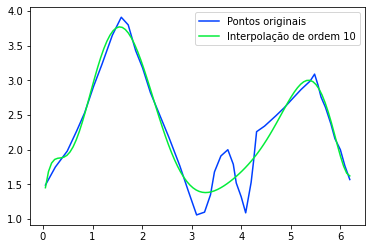

In [10]:
n = 10
# Ajustando um polinômio de grau n aos pontos de dados
p = np.polyfit(x, y, n)

# Criando uma lista de valores x para avaliar o polinômio
x_new = np.linspace(min(x), max(x), num=100, endpoint=True)

# Avaliando o polinômio nos novos valores de x
y_new = np.polyval(p, x_new)

# Imprimindo os resultados
# Plotando os pontos originais e os pontos interpolados
plt.plot(x, y, '-', x_new, y_new, '-')
plt.legend(['Pontos originais', 'Interpolação de ordem {}'.format(n)], loc='best')
plt.show()


# Método da Série de Fourier

In [5]:
ORDEM = 10
As = []
Bs = []
for i in range(ORDEM):
    y1 = y*np.cos(i*x)/np.pi
    A = integrate.simpson(y1, x)
    y2 = y*np.sin(i*x)/np.pi
    B = integrate.simpson(y2,x)
    As.append(A)
    Bs.append(B)
y_serie = np.zeros(len(x)) + As[0]/2
for i in range(1, len(As)):
    y_serie = y_serie + As[i]*np.cos(i*x) + Bs[i]*np.sin(i*x)

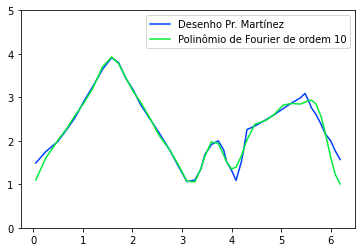

In [6]:
fig, ax = plt.subplots(1,1)
ax.plot(x,y, label = 'Desenho Pr. Martínez')
ax.plot(x, y_serie, label = f"Polinômio de Fourier de ordem {ORDEM}")
ax.set_ylim(0,5)
ax.legend()
ax.legend(loc='upper right')

Agora vamos fazer o mesmo, porém, ao invés de utilizar a fórmula, vamos utilizar um algoritmo genético:

In [13]:
def create_frame(t, x, y, x_1, y_1,y_2):    
    """ Função cria cada frame do gif
    Args:
    t= numero do frame
    xx= lista de coordenadas x do ponto
    yy= lista de coordenadas y do ponto

    Retorna:
    Gráfico que servirá como frame para o gif"""
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # Plotar o primeiro subplot
    axs[0].plot(x,y, label = 'Desenho Pr. Martínez')
    axs[0].plot(x_1, y_1, label = f"Interpolação ordem {ORDEM}")
    axs[0].set_ylim(0,5)
    axs[0].set_xlim(0,6)
    axs[0].legend()
    axs[0].legend(loc='upper right')
    # Plotar o segundo subplot
    axs[1].plot(x,y, label = 'Desenho Pr. Martínez')
    axs[1].plot(x, y_2, label = f"Polinômio de Fourier de ordem {ORDEM}")
    axs[1].set_ylim(0,5)
    axs[1].set_xlim(0,6)
    axs[1].legend()
    axs[1].legend(loc='upper right')

    # Exibir a figura
    
    plt.savefig(f'./Figuras/img_{t}.png', 
                transparent = False,  
                facecolor = 'white'
                )
    plt.close()

In [14]:
for ORDEM in range(1,30):
    # Plotar os pontos e a função polinomial
    # Criando uma lista de valores x para avaliar o polinômio
    p = np.polyfit(x, y, ORDEM)
    x_1 = np.linspace(min(x), max(x), num=100, endpoint=True)
    # Avaliando o polinômio nos novos valores de x
    y_1 = np.polyval(p, x_new)
    As = []
    Bs = []
    for i in range(ORDEM):
        y1 = y*np.cos(i*x)/np.pi
        A = integrate.simpson(y1, x)
        y2 = y*np.sin(i*x)/np.pi
        B = integrate.simpson(y2,x)
        As.append(A)
        Bs.append(B)
    y_2 = np.zeros(len(x)) + As[0]/2
    for i in range(1, len(As)):
        y_2 = y_2 + As[i]*np.cos(i*x) + Bs[i]*np.sin(i*x)
    create_frame(ORDEM, x, y, x_1, y_1, y_2)
    warnings.filterwarnings('ignore')

In [15]:
frames=[]
for t in range(1,30):
    image = imageio.imread(f'./Figuras/img_{t}.png')
    frames.append(image)

# Criamos e salvando o gif!!!
imageio.mimsave('./Figuras/Gif_Fourier.gif', # output gif
                frames,          # array of input frames
                fps = 1.5)         # optional: frames per second


<center>
  <img src='./Figuras/Gif_Fourier.gif' style="width:1000px;height:400px"/>
</center>  

## Conclusão



Concluo que o algoritmo génético funcionou e conseguiu aproximar muito bem o desenho. No entanto, ao rodar o código várias vezes, percebi que nem sempre ele dá certo. As vezes ele falha completamente e chega em uma função que não se parece nem um pouco com o desenho, e as vezes ele chega muito próximo. Além disso, percebi que, começando com um polinômio de ordem baixa e aumentando a ordem, observa-se o resultado esperado, que é a aproximação melhorando. No entanto, acima de um certo ponto ($\pm$ ordem 7) a aproximação começa a piorar muito. Provavelmente isso se dá pois o espaço de busca começa a ficar muito grande, e consequentemente fica mais difícil para o algoritmo encontrar mínimos em um espaço tão grande.